<h1><center>Laboratorio 4: La solicitud de Mathias 🤗</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: María Jesús Valenzuela
- Nombre de alumno 2: Matías Zúñiga


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/jesuvalenzuela/NanSquad)

## Temas a tratar
- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines y Column Transformers.
- Utilizar diferentes algoritmos de cluster y ver el desempeño.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender cómo aplicar pipelines de Scikit-Learn para generar clusters.
- Familiarizarse con plotly.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio

<center>
<img src="https://i.pinimg.com/originals/5a/a6/af/5aa6afde8490da403a21601adf7a7240.gif" width=400 />

En el corazón de las operaciones de Aerolínea Lucero, Mathias, el gerente de análisis de datos, reunió a un talentoso equipo de jóvenes científicos de datos para un desafío crucial: segmentar la base de datos de los clientes. “Nuestro objetivo es descubrir patrones en el comportamiento de los pasajeros que nos permitan personalizar servicios y optimizar nuestras campañas de marketing,” explicó Mathias, mientras desplegaba un amplio rango de datos que incluían desde hábitos de compra hasta opiniones sobre los vuelos.

Mathias encargó a los científicos de datos la tarea de aplicar técnicas avanzadas de clustering para identificar distintos segmentos de clientes, como los viajeros frecuentes y aquellos que eligen la aerolínea para celebrar ocasiones especiales. La meta principal era entender profundamente cómo estos grupos perciben la calidad y satisfacción de los servicios ofrecidos por la aerolínea.

A través de un enfoque meticuloso y colaborativo, los científicos de datos se abocaron a la tarea, buscando transformar los datos brutos en valiosos insights que permitirían a Aerolínea Lucero no solo mejorar su servicio, sino también fortalecer las relaciones con sus clientes mediante una oferta más personalizada y efectiva.

## Importamos librerias utiles 😸

In [60]:
import numpy as np
import pandas as pd

from sklearn import datasets

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Librerías adicionales
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings

## 1. Estudio de Performance 📈 [10 Puntos]



<center>
<img src="https://i.pinimg.com/originals/23/b7/6e/23b76e9e77e63c0eec1a7b28372369e3.gif" width=300>

Don Mathias les ha encomendado su primera tarea: analizar diversas técnicas de clustering. Su objetivo es entender detalladamente cómo funcionan estos métodos en términos de segmentación y eficiencia en tiempo de ejecución.

Analice y compare el desempeño, tiempo de ejecución y visualizaciones de cuatro algoritmos de clustering (k-means, DBSCAN, Ward y GMM) aplicados a tres conjuntos de datos, incrementando progresivamente su tamaño. Utilice Plotly para las gráficas y discuta los resultados tanto cualitativa como cuantitativamente.

Uno de los requisitos establecidos por Mathias es que el análisis se lleve a cabo utilizando Plotly; de no ser así, se considerará incorrecto. Para facilitar este proceso, se ha proporcionado un código de Plotly que puede servir como base para realizar las gráficas. Apóyese en el código entregado para efectuar el análisis y tome como referencia la siguiente imagen para realizar los gráficos:

<img src='https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/Screenshot_2024-04-26_at_9.10.44_AM.png' width=800 />

En el gráfico se visualizan en dos dimensiones los diferentes tipos de datos proporcionados en `datasets`. Cada columna corresponde a un modelo de clustering diferente, mientras que cada fila representa un conjunto de datos distinto. Cada uno de los gráficos incluye el tiempo en segundos que tarda el análisis y la métrica Silhouette obtenida.

Para ser más específicos, usted debe cumplir los siguientes objetivos:
1. Generar una función que permita replicar el gráfico expuesto en la imagen (no importa que los colores calcen). [4 puntos]
2. Ejecuta la función para un `n_samples` igual a 1000, 5000, 10000. [2 puntos]
3. Analice y compare el desempeño, tiempo de ejecución y visualizaciones de cuatro algoritmos de clustering utilizando las 3 configuraciones dadas en `n_samples`. [4 puntos]


> ❗ Tiene libertad absoluta de escoger los hiper parámetros de los cluster, sin embargo, se recomienda verificar el dominio de las variables para realizar la segmentación.

> ❗ Recuerde que es obligatorio el uso de plotly.


In [2]:
"""
En la siguiente celda se crean los datos ficticios a usar en la sección 1 del lab.
❗No realice cambios a esta celda a excepción de n_samples❗
"""

# Datos a utilizar

# Configuracion
n_samples = 5000 #Este parámetro si lo pueden modificar

def create_data(n_samples):

    # Lunas
    moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=30)
    # Blobs
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=172)
    # Datos desiguales
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    mutated = (np.dot(blobs[0], transformation), blobs[1])

    # Generamos Dataset
    dataset = {
        'moons':{
            'x': moons[0], 'classes': moons[1], 'n_cluster': 2
        },
        'blobs':{
            'x': blobs[0], 'classes': blobs[1], 'n_cluster': 3
        },
        'mutated':{
            'x': mutated[0], 'classes': mutated[1], 'n_cluster': 3
        }
    }
    return dataset

data_sets = create_data(n_samples)

**Respuestas:**

In [ ]:
def plot_scatter(x, y, color):
    """
    Función para crear scatter plot usando plotly
    """
    return go.Scattergl(
        x=x, 
        y=y,
        mode="markers",
        marker=dict(
            size=4, 
            color=color, 
            showscale=False,
            colorscale='viridis'
        ),
        showlegend=False
    )

def get_clustering_models(n_clusters):
    """
    Retorna diccionario con modelos de clustering configurados.
    """
    return {
        'K-Means': KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        'GMM': GaussianMixture(n_components=n_clusters, random_state=42),
        'Ward': AgglomerativeClustering(n_clusters=n_clusters, linkage="ward"),
        'DBSCAN': DBSCAN(eps=0.35, min_samples=10)
    }

def fit_and_predict_clustering(model, X, model_name):
    """
    Ajusta modelo de clustering y realiza predicción.
    """
    start_time = time.perf_counter()
    
    if model_name == 'GMM':
        model.fit(X)
        labels = model.predict(X)
    else:
        labels = model.fit_predict(X)
    
    execution_time = time.perf_counter() - start_time
    return labels, execution_time

# Parámetros fijos
DATASETS = ["moons", "blobs", "mutated"]
MODELS = ['K-Means', 'GMM', 'Ward', 'DBSCAN']

def clustering_visualization(n_samples):
    """Implementa modelos de clustering y crea gráfico comparativo."""
    # Generar datasets para n_samples
    data_sets = create_data(n_samples)
    
    # Figura para gráfico
    fig = make_subplots(
        rows=3, 
        cols=4,
        horizontal_spacing=0.05, 
        vertical_spacing=0.08,
        row_titles=DATASETS
    )

    for row, dataset_name in enumerate(DATASETS, start=1):
        X = data_sets[dataset_name]["x"]
        n_clusters = data_sets[dataset_name]["n_cluster"]
        
        # Estandarizar datos
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Obtener modelos configurados
        models = get_clustering_models(n_clusters)

        for col, (model_name, model) in enumerate(models.items(), start=1):
            # Ajustar modelo y medir tiempo
            labels, exec_time = fit_and_predict_clustering(model, X_scaled, model_name)
            
            # Calcular métrica silhouette
            silhouette = silhouette_score(X_scaled, labels)

            # Crear scatter plot
            trace = plot_scatter(X[:, 0], X[:, 1], labels)
            fig.add_trace(trace, row=row, col=col)
            
            # Agregar anotaciones
            annotation_text = f"{exec_time:.3f} [s] | s: {silhouette:.3f}"

            fig.add_annotation(
                text=annotation_text,
                x=0.5, y=1.01,      # posición
                xref="x domain", yref="y domain",       # referencias para posición
                xanchor="center", yanchor="bottom",     # ancla para referencia
                showarrow=False,        # ocultar flecha
                row=row, col=col,
                font=dict(size=10)
            )

            # Nombres de modelos
            if row == 1:
                fig.add_annotation(
                    text=model_name,
                    x=0.5, y=1.1,
                    xref="x domain", yref="y domain",
                    xanchor="center", yanchor="bottom",
                    showarrow=False,
                    row=row, col=col,
                    font=dict(size=14, weight='bold')
                )

    # Configurar layout general
    fig.update_layout(
        height=800, 
        width=1000,
        title=dict(
            text=f"Comparación de Tiempos de Ejecución por Técnica: {n_samples:,} muestras",
            x=0.5, y=0.95),
        showlegend=False
    )

    return fig

In [ ]:
# Ejecutar análisis
SAMPLE_SIZES = [1000, 5000, 10000]

for n_samples in SAMPLE_SIZES:
    fig = clustering_visualization(n_samples)
    fig.show()

Se aprecian comportamientos muy distintos dependiendo de la estructura del dataset y del tamaño de muestra. En los datos tipo moons, que tienen una estructura no lineal con forma de medialunas, K-Means y GMM muestran una tendencia a dividir el conjunto en cortes lineales, lo que en ocasiones resulta en clusters bien separados numéricamente (silhouette alto) pero poco fieles a la geometría real. En contraste, DBSCAN logra capturar mejor la curvatura de las lunas, identificando los dos arcos con mayor naturalidad y manteniendo una buena métrica de silhouette. El método jerárquico Ward también distingue adecuadamente los arcos, aunque lo hace con mayor costo computacional que K-Means o GMM.

En el caso de los blobs, que son esencialmente grupos gaussianos separados, tanto K-Means como GMM se adaptan perfectamente a la estructura esférica y producen resultados limpios con silhouettes consistentes alrededor de 0.5–0.6. Ward mantiene un rendimiento muy similar, aunque a costa de un tiempo de cómputo bastante más alto cuando el número de muestras crece. DBSCAN también puede detectar estos grupos, pero su desempeño depende mucho de los parámetros de densidad, lo que a veces lo lleva a fusionar o separar en exceso.

Los datos mutados, que representan clusters alargados y oblicuos, revelan mejor las diferencias entre algoritmos. K-Means, al asumir particiones esféricas, tiende a forzar cortes poco naturales, mientras que GMM logra una adaptación más flexible a la forma elíptica, entregando agrupamientos más fieles. Ward también logra una segmentación razonable, aunque con tiempos de ejecución más altos. DBSCAN en este escenario se vuelve sensible a la elección de eps, pudiendo producir fragmentación o fusión según el ajuste, aunque en los resultados observados mantiene un desempeño aceptable.

En cuanto a la eficiencia, se observa claramente que Ward es el algoritmo menos escalable: pasa de tiempos de milisegundos con 1000 observaciones a casi un segundo con 10 000, mientras que K-Means y GMM escalan de forma mucho más suave, permaneciendo en rangos de milésimas a centésimas. DBSCAN ocupa una posición intermedia: más costoso que K-Means y GMM, pero todavía bastante más rápido que Ward. En términos prácticos, esto significa que para volúmenes de datos muy grandes, K-Means y GMM son más convenientes cuando la estructura de los clusters es aproximadamente gaussiana o elíptica, mientras que DBSCAN y Ward son útiles para capturar geometrías más complejas o jerárquicas, pero a un mayor costo de tiempo.

## 2. Análisis de Satisfacción de Vuelos. [10 puntos]

<center>
<img src="https://media4.giphy.com/media/v1.Y2lkPTZjMDliOTUyb3B5Y3BtbTZwMnB0ZXRyejFpanJkNDl5cGhoeWlsc2k5bGx1MTUwYSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/l4FARHkIFJReGSy2c/giphy.gif" width=400 />

Habiendo entendido cómo funcionan los modelos de aprendizaje no supervisado, *Don Mathias* le encomienda estudiar la satisfacción de pasajeros al haber tomado un vuelo en alguna de sus aerolineas. Para esto, el magnate le dispone del dataset `aerolineas_licer.parquet`, el cual contiene el grado de satisfacción de los clientes frente a diferentes aspectos del vuelo. Las características del vuelo se definen a continuación:

- *Gender*: Género de los pasajeros (Femenino, Masculino)
- *Customer Type*: Tipo de cliente (Cliente habitual, cliente no habitual)
- *Age*: Edad actual de los pasajeros
- *Type of Travel*: Propósito del vuelo de los pasajeros (Viaje personal, Viaje de negocios)
- *Class*: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)
- *Flight distance*: Distancia del vuelo de este viaje
- *Inflight wifi service*: Nivel de satisfacción del servicio de wifi durante el vuelo (0:No Aplicable; 1-5)
- *Departure/Arrival time convenient*: Nivel de satisfacción con la conveniencia del horario de salida/llegada
- *Ease of Online booking*: Nivel de satisfacción con la facilidad de reserva en línea
- *Gate location*: Nivel de satisfacción con la ubicación de la puerta
- *Food and drink*: Nivel de satisfacción con la comida y la bebida
- *Online boarding*: Nivel de satisfacción con el embarque en línea
- *Seat comfort*: Nivel de satisfacción con la comodidad del asiento
- *Inflight entertainment*: Nivel de satisfacción con el entretenimiento durante el vuelo
- *On-board service*: Nivel de satisfacción con el servicio a bordo
- *Leg room service*: Nivel de satisfacción con el espacio para las piernas
- *Baggage handling*: Nivel de satisfacción con el manejo del equipaje
- *Check-in service*: Nivel de satisfacción con el servicio de check-in
- *Inflight service*: Nivel de satisfacción con el servicio durante el vuelo
- *Cleanliness*: Nivel de satisfacción con la limpieza
- *Departure Delay in Minutes*: Minutos de retraso en la salida
- *Arrival Delay in Minutes*: Minutos de retraso en la llegada

En consideración de lo anterior, realice las siguientes tareas:

0. Ingeste el dataset a su ambiente de trabajo.

1. Seleccione **sólo las variables numéricas del dataset**.  Explique qué éfectos podría causar el uso de variables categóricas en un algoritmo no supervisado. [2 punto]

2. Realice una visualización de la distribución de cada variable y analice cada una de estas distribuciones. [2 punto]

3. Basándose en los gráficos, evalúe la necesidad de escalar los datos y explique el motivo de su decisión. [2 puntos]

4. Examine la correlación entre las variables mediante un correlograma. [2 puntos]

5. De acuerdo con los resultados obtenidos en 4, reduzca la dimensionalidad del conjunto de datos a cuatro variables, justificando su elección respecto a las variables que decide eliminar. [2 puntos]

**Respuesta:**

### 0. Ingesta del dataset

In [53]:
# Ingesta del dataset
df = pd.read_parquet("aerolineas_lucer.parquet")

print("Shape:", df.shape, "\n")
print("Columnas:", df.columns.tolist(), "\n")

# Revisar duplicados y nulos
print("Filas duplicadas:", df.duplicated().sum(), "\n")

print("Nulos:")
print(df.isna().sum(), "\n")

# Identificar tipos de datos
print("Tipos de dato:")
print(df.dtypes, "\n")

df.head()

Shape: (236114, 23) 

Columnas: ['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] 

Filas duplicadas: 132522 

Nulos:
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding      

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Seat comfort  Inflight entertainment  \
0                       3  ...             5                       5   
1                       3  ...             1                       1   
2                       2  ...             5                       5   
3                       5  ...             2                       2   
4                       3  ...             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4               3.0                 4              4.0   
1                 1               5.0                 3              1.0   
2                 4               3.0                 4              4.0   
3                 2               5.0                 3              1.0   
4                 3               4.0                 4              3.0   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0               5.0            5                          25   
1               4.0            1                           1   
2               4.0            5                           0   
3               4.0            2                          11   
4               3.0            3                           0   

   Arrival Delay in Minutes  
0                      18.0  
1                       6.0  
2                       0.0  
3                       9.0  
4                       0.0  

[5 rows x 23 columns]

In [54]:
# Limpieza de duplicados
df.drop_duplicates(inplace=True)

# Eliminar columna id
df.drop(columns=['id'], inplace=True)

### 1. Selección de variables numéricas

In [58]:
# Selección de variables numéricas
num_cols = df.select_dtypes('number').columns.tolist()
df_num = df[num_cols]

df_num.head()

Age  Flight Distance  Inflight wifi service  \
0   13              460                      3   
1   25              235                      3   
2   26             1142                      2   
3   25              562                      2   
4   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4               3.0                 4              4.0   
1                 1               5.0                 3              1.0   
2                 4               3.0                 4              4.0   
3                 2               5.0                 3              1.0   
4                 3               4.0                 4              3.0   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0               5.0            5                          25   
1               4.0            1                           1   
2               4.0            5                           0   
3               4.0            2                          11   
4               3.0            3                           0   

   Arrival Delay in Minutes  
0                      18.0  
1                       6.0  
2                       0.0  
3                       9.0  
4                       0.0

El uso de variables categóricas en un algoritmo no supervisado puede generar diversos problemas relacionados con las métricas de distancia. En particular, la distancia euclediana, utilizada por la mayoría de algoritmos de *clustering*, no tiene sentido para variables categóricas.
Las variables categóricas no tienen un orden natural que permita calcular distancias válidas.

### 2.Visualización de distribuciones

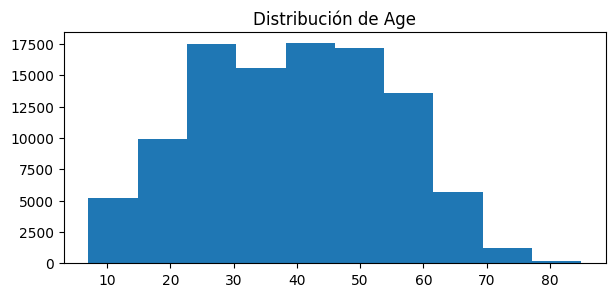

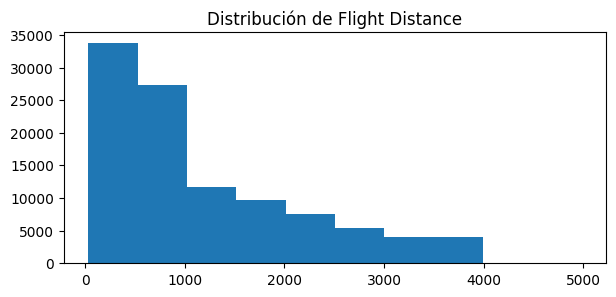

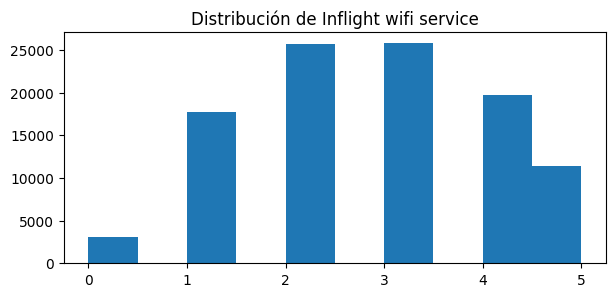

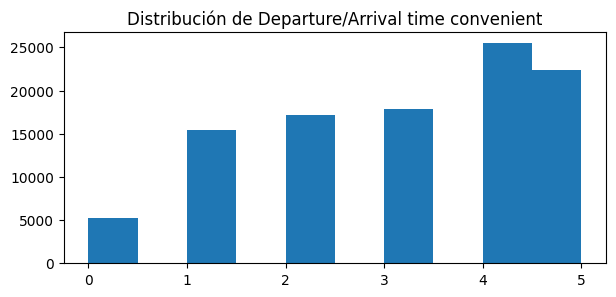

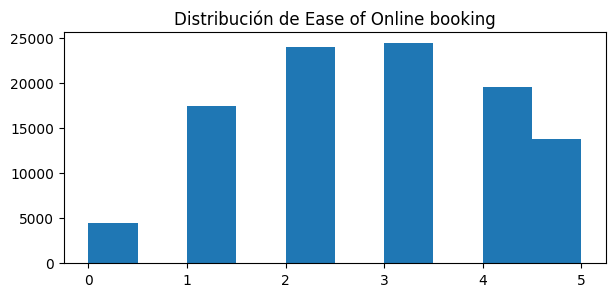

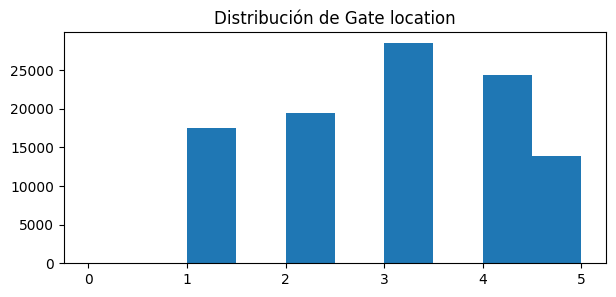

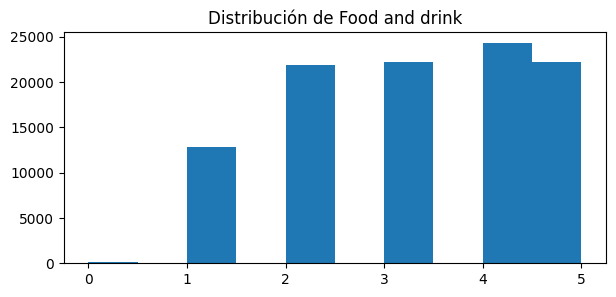

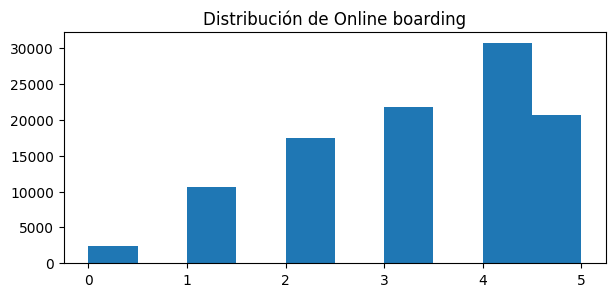

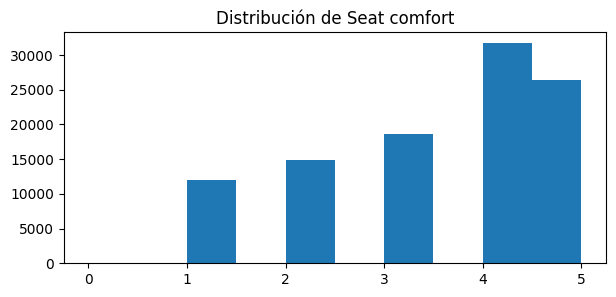

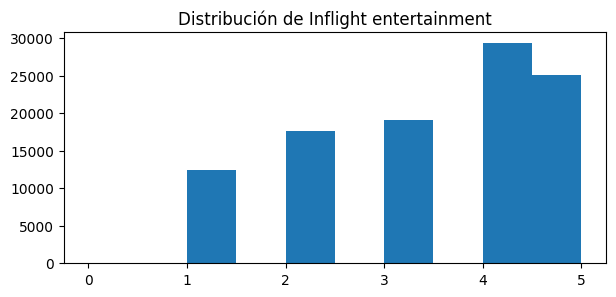

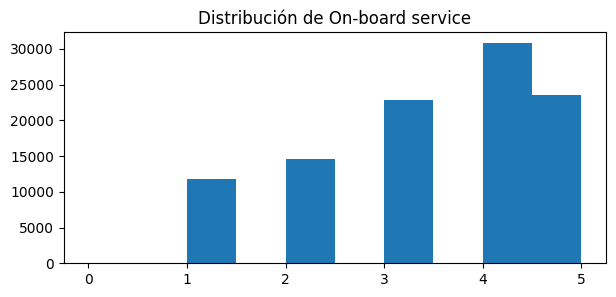

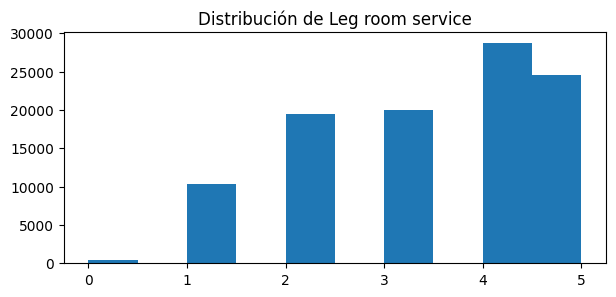

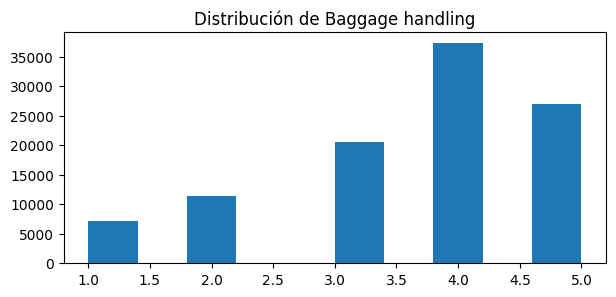

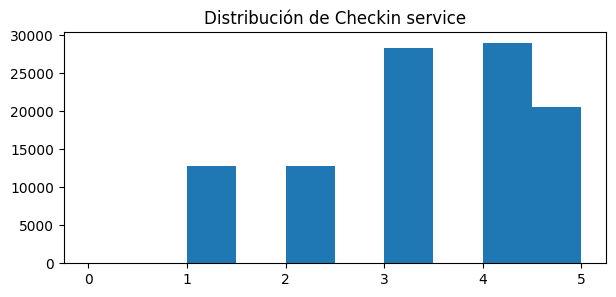

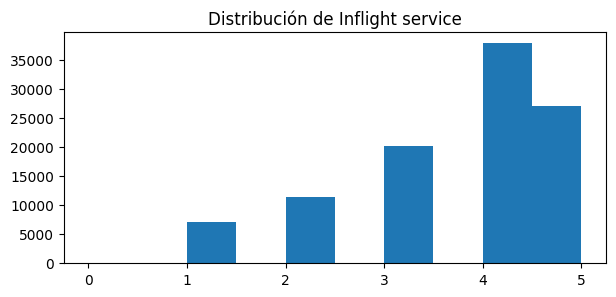

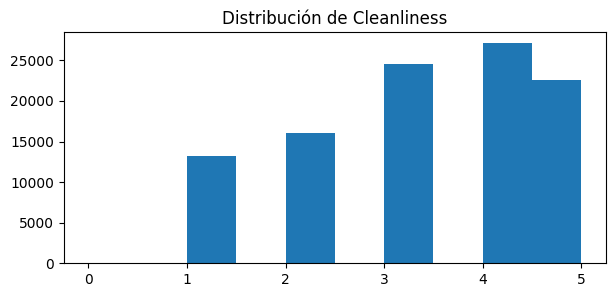

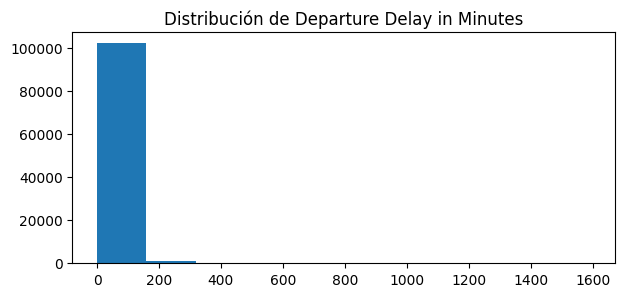

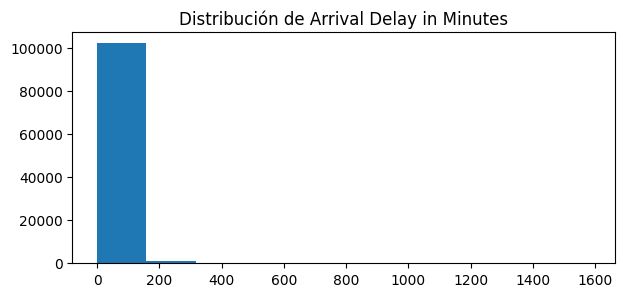

In [57]:
# Visualización de distribuciones
for col in num_cols:
    plt.figure(figsize=(7,3))
    plt.hist(df_num[col], bins=10)
    plt.title(f"Distribución de {col}")
    plt.show()

En la visualización de las distribuciones se aprecian distintos comportamientos según el tipo de variable. Algunas, como la edad y la distancia de vuelo, presentan distribuciones continuas. Age sigue un patrón cercano a normal, concentrado en adultos entre 30 y 50 años, mientras que Flight Distance tiene una clara asimetría positiva, con la mayoría de vuelos cortos y pocos vuelos de larga distancia. Las variables de satisfacción en servicio (wifi, comida, asiento, entretenimiento, entre otras) son discretas en escala 1 a 5 y tienden a concentrarse en valores intermedios o altos. Por otra parte, las variables relacionadas con retrasos en minutos (salida y llegada) están fuertemente sesgadas hacia cero, con pocos valores atípicos muy grandes que generan colas largas.

### 3. Escalamiento de datos

A partir de lo anterior, se justifica la necesidad de escalar los datos. Si se aplicaran algoritmos de clustering sin escalar, variables como Flight Distance (que puede alcanzar miles de kilómetros) o los Delays dominarían la distancia euclidiana, opacando el efecto de variables en escalas pequeñas como las de satisfacción (1 a 5). Con el uso de StandardScaler todas las variables quedan con media cero y varianza unitaria, garantizando que cada dimensión aporte de manera balanceada al análisis no supervisado.

In [59]:
# Escalamiento de datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=num_cols)

In [51]:
df_scaled

Age  Flight Distance  Inflight wifi service  \
0      -1.745544        -0.731307               0.203518   
1      -0.951524        -0.956917               0.203518   
2      -0.885356        -0.047461              -0.549576   
3      -0.951524        -0.629031              -0.549576   
4       1.430536        -0.977973               0.203518   
...          ...              ...                    ...   
103587  1.562872        -0.899762              -0.549576   
103588 -0.356009         1.486681               0.203518   
103589 -0.686851        -0.588923               0.203518   
103590 -0.885356         1.648117               1.709706   
103591 -0.819188         0.768743               0.203518   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                0.616268                0.173713   
1                               -0.695014                0.173713   
2                               -0.695014               -0.541122   
3                                1.271908                1.603383   
4                               -0.039373                0.173713   
...                                   ...                     ...   
103587                          -0.695014               -0.541122   
103588                          -0.039373                0.173713   
103589                          -0.695014                0.173713   
103590                           1.271908                1.603383   
103591                          -0.039373                0.173713   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0           -1.547333        1.352383        -0.185644      1.182981   
1            0.017981       -1.656488        -0.185644     -1.849864   
2           -0.764676        1.352383         1.296475      1.182981   
3            1.583296       -0.904270        -0.926704     -1.091652   
4            0.017981        0.600165         1.296475      1.182981   
...               ...             ...              ...           ...   
103587      -0.764676        0.600165         1.296475      1.182981   
103588       0.017981        0.600165         1.296475      1.182981   
103589       0.017981        0.600165        -0.185644      0.424770   
103590       1.583296        1.352383         0.555416      1.182981   
103591       0.017981       -1.656488        -0.185644     -1.849864   

        Inflight entertainment  On-board service  Leg room service  \
0                     1.231512          0.479254         -0.267152   
1                    -1.769171         -1.849434          1.253316   
2                     1.231512          0.479254         -0.267152   
3                    -1.019000         -1.073205          1.253316   
4                    -0.268830         -0.296976          0.493082   
...                        ...               ...               ...   
103587                1.231512          1.255483          0.493082   
103588                0.481341          0.479254          0.493082   
103589                0.481341         -0.296976         -0.267152   
103590                1.231512         -0.296976          0.493082   
103591               -1.769171          0.479254         -1.027386   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0               0.311859         0.549792          1.156237     1.305895   
1              -0.534847        -1.821020          0.305603    -1.742435   
2               0.311859         0.549792          0.305603     1.305895   
3              -0.534847        -1.821020          0.305603    -0.980352   
4               0.311859        -0.240479         -0.545031    -0.218270   
...                  ...              ...               ...          ...   
103587          1.158565        -1.821020          1.156237     1.305895   
103588          0.311859         1.340062          0.305603    -0.218270   
103589          0.311859         0.549792          0.305603     0.543813 

### 4. Correlograma

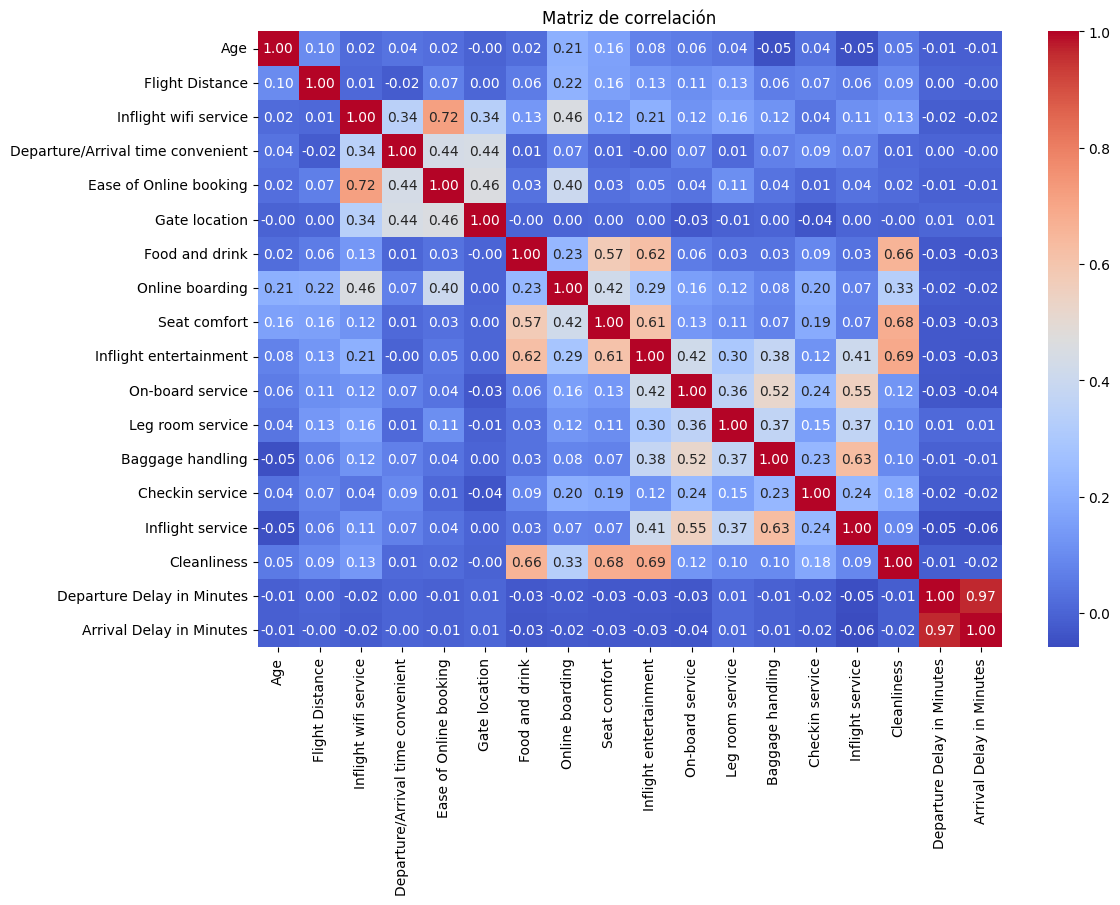

In [61]:
### 4. Correlograma
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

### 5. Reducción de dimensionalidad

En el correlograma se identificó pares de variables altamente correlacionadas. Se identificó, por ejemplo, una alta correlación entre `Departure Delay in Minutes` y `Arrival Delay in Minutes`, lo cual era esperable porque los retrasos de salida suelen propagarse a la llegada.
Asimismo, varias variables de satisfacción mostraron correlaciones moderadas, como `Seat comfort`, `On-board service` y `Leg room service`, reflejando que la percepción de comodidad tiende a estar asociada en distintas dimensiones del viaje. En contraste, variables como `Age` y `Flight Distance` mostraron correlaciones muy bajas con el resto, aportando información distinta. Esta información es útil para evitar redundancias en modelos predictivos y para comprender cómo los pasajeros asocian distintas experiencias de vuelo.

En base a las correlaciones, y considerando que muchas de estas variables numéricas en realidad son categóricas ordinales, se seleccionó las siguientes variables para la reducción de dimensionalidad:
- `Age`: Variable numérica, con bajas correlaciones con otras variables, aportando información única.
- `Flight Distance`: Variable numérica, ajas correlaciones con otras variables, aportando información única.
- `Departure Delay in Minutes`: Variable numérica, se correlaciona considerablemente con 'Arrival Delay in Minutes', la cual no se incluye, por lo que aporta información de ambas.
- `Cleanliness`: Si bien es ordinal, se correlaciona con diversas variables no incluidas, aportando la mayor información posible sobre estas.

Otras variables se eliminan por ofrecer una menor cantidad de información, al ser redundantes con variables seleccionadas o, al contrario, no incluir información sobre suficientes variables no incluidas.

In [62]:
# Reducción de dimensionalidad
selected_features = [
    "Age",
    "Flight Distance",
    "Departure Delay in Minutes",
    "Cleanliness"
]

df_reduced = df_scaled[selected_features]
df_reduced.head()

Age  Flight Distance  Departure Delay in Minutes  Cleanliness
0 -1.745544        -0.731307                    0.268956     1.305895
1 -0.951524        -0.956917                   -0.360686    -1.742435
2 -0.885356        -0.047461                   -0.386921     1.305895
3 -0.951524        -0.629031                   -0.098335    -0.980352
4  1.430536        -0.977973                   -0.386921    -0.218270

## 3. Preprocesamiento 🎭. [10 puntos]

<center>
<img src="https://media.tenor.com/R_WseIIwQ8QAAAAM/beavis-computer.gif" width=400>

Tras quedar satisfecho con los resultados presentados en el punto 2, el dueño de la empresa ha solicitado que se preprocesen los datos mediante un `pipeline`. Es crucial que este proceso tenga en cuenta las observaciones derivadas de los análisis anteriores. Adicionalmente, ha expresado su interés en visualizar el conjunto de datos en un gráfico de dos o tres dimensiones.

Basándose en los análisis realizados anteriormente:
1. Cree un `pipeline` que incluya PCA, utilizando las consideraciones mencionadas previamente para proyectar los datos a dos dimensiones. [4 puntos]
2. Grafique los resultados obtenidos y comente lo visualizado. [6 puntos]

**Respuestas:**

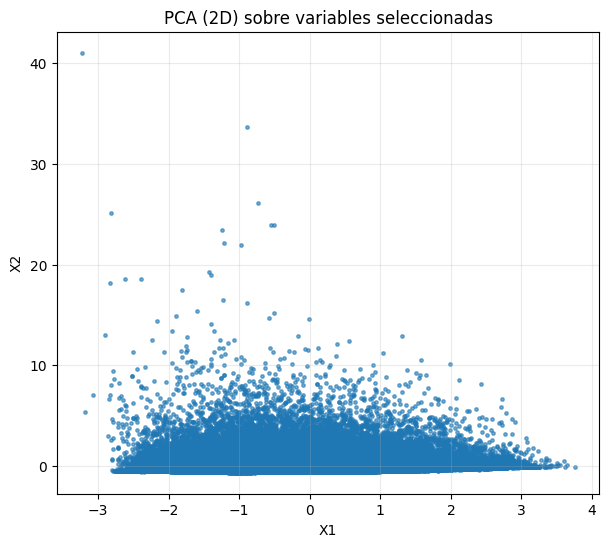

Varianza explicada por X1 y X2: 29.17% + 25.02% 



In [97]:
# PCA con 2 componentes sobre variables seleccionadas
X = df[selected_features].copy()

# Pipeline
pca_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2, random_state=0))
])

X_pca = pca_pipe.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns = ['X1', 'X2'])

# Gráfico PCA 2D
plt.figure(figsize=(7,6))
plt.scatter(df_pca["X1"], df_pca["X2"], s=6, alpha=0.6)
plt.title("PCA (2D) sobre variables seleccionadas")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True, alpha=0.25)
plt.show()

# Varianza explicada 
expl = pca_pipe.named_steps["pca"].explained_variance_ratio_
print(f"Varianza explicada por X1 y X2: {expl[0]:.2%} + {expl[1]:.2%}", "\n")


El gráfico muestra las variables previamente seleccionadas y escaladas, proyectadas sobre las dos dimensiones de mayor variación (componentes principales).
Estas explican, respectivamente, el 29.17% y 25.02% de la varianza original. Es decir, se pierde cerca de 50% de la información, lo cual es razonable considerando que ya se tenían 4 dimensiones con baja correlación entre si, seleccionadas para ser lo más explicativas posible.

Además, se observa que X1 muestra una variación más homogénea, mientras que X2 resalta la presencia de outliers.

## 4. Outliers 🚫🙅‍♀️❌🙅‍♂️ [10 puntos]

<center>
<img src="https://joachim-gassen.github.io/images/ani_sim_bad_leverage.gif" width=250>

Con el objetivo de mantener la claridad en su análisis, Don Mathias le ha solicitado entrenar un modelo que identifique pasajeros con comportamientos altamente atípicos.

1. Utilice `IsolationForest` para clasificar las anomalías del dataset (sin aplicar PCA), configurando el modelo para que sólo el 1% de los datos sean considerados anómalos. Asegúrese de integrar esta tarea dentro de un `pipeline`. [3 puntos]

2. Visualice los resultados en el gráfico de dos dimensiones previamente creado. [3 puntos]

3. ¿Cómo evaluaría el rendimiento de su modelo en la detección de anomalías? [4 puntos]

**Respuestas:**

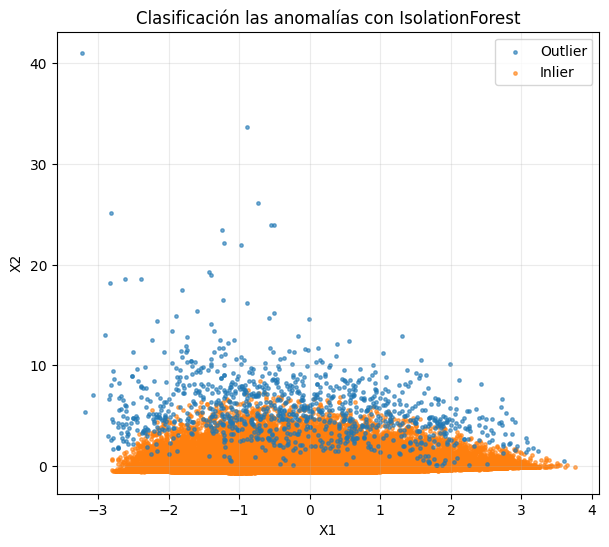

In [ ]:
# Escriba su código aquí
X = df[selected_features].copy()

# Pipeline
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", IsolationForest(contamination=0.01, random_state=0))
])

# Aplicar pipeline
pipe.fit(X)
X_forest = pipe.predict(X)

# Etiquetas
is_outlier = (X_forest==-1)
is_inlier = (X_forest==1)

# Gráfico 2D
plt.figure(figsize=(7,6))
plt.scatter(df_pca["X1"][is_outlier], df_pca["X2"][is_outlier],
            s=6, alpha=0.6, label='Outlier')
plt.scatter(df_pca["X1"][is_inlier], df_pca["X2"][is_inlier],
            s=6, alpha=0.6, label='Inlier', zorder=0)
plt.legend()
plt.title("Clasificación las anomalías con IsolationForest")
plt.xlabel("X1")
plt.ylabel("X2")

plt.grid(True, alpha=0.25)
plt.show()


El comportamiento del modelo es, por una parte, satisfactorio, pues identifica con éxito aquellos puntos más "alejados" del resto, especialmente a los largo de la segunda componente principal. Sin embargo, también clasifica como outliers a una buena cantidad de puntos que si se encuentran en la zona más densa de datos. Lo más probable, es que estos datos se hayan encontrado más alejados al resto previo a la aplicación de PCA. Es decir, representan aquella variabilidad que se perdió al aplicar PCA.

## 5. Métricas de Desempeño 🚀 [10 puntos]

<center>
<img src="https://i.imgflip.com/6xz0ij.gif" width=400>

Motivado por incrementar su fortuna, Don Mathias le solicita entrenar un modelo que le permita segmentar a los pasajeros en grupos distintos, con el objetivo de optimizar las diversas campañas de marketing diseñadas por su equipo. Para ello, le se pide realizar las siguientes tareas:

1. Utilizar el modelo **Gaussian Mixture** y explore diferentes configuraciones de número de clústers, específicamente entre 3 y 8. Asegúrese de integrar esta operación dentro de un `pipeline`. [4 puntos]
2. Explique cuál sería el criterio adecuado para seleccionar el número óptimo de clústers. **Justifique de forma estadistica y a traves de gráficos.** [6 puntos]

> **HINT:** Se recomienda investigar sobre los criterios AIC y BIC para esta tarea.

**Respuestas:**

Clusters: 3 | AIC: 420903.81 | BIC: 421323.93
Clusters: 4 | AIC: 400708.04 | BIC: 401271.38
Clusters: 5 | AIC: 391983.27 | BIC: 392689.84
Clusters: 6 | AIC: 357231.11 | BIC: 358080.90
Clusters: 7 | AIC: 349562.36 | BIC: 350555.37
Clusters: 8 | AIC: 346463.74 | BIC: 347599.97

Óptimo según AIC: 8 clusters
Óptimo según BIC: 8 clusters


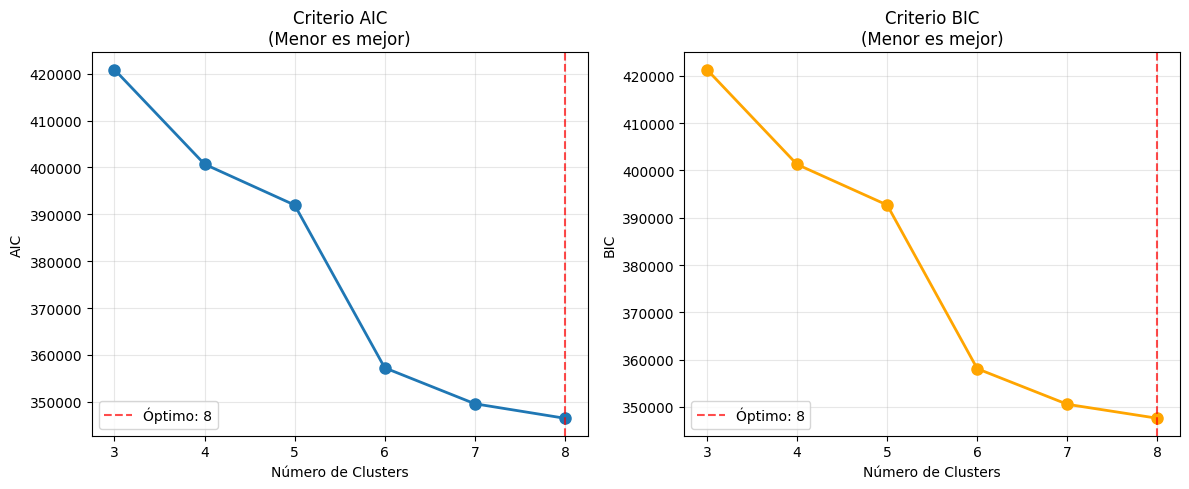

In [70]:
# Escriba su código aquí
X = df[selected_features].copy()

CLUSTER_SIZES = [3, 4, 5, 6, 7, 8]

# Listas para almacenar resultados
aic_scores = []
bic_scores = []

def gmm_pipe(n_clusters):
    pipe = Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clustering", GaussianMixture(
            n_components=n_clusters, 
            random_state=42,
        ))
    ])
    return pipe

for n_clusters in CLUSTER_SIZES:
    # Pipeline con StandardScaler y GaussianMixture
        pipe = gmm_pipe(n_clusters)
        
        # Entrenar el pipeline y predecir clusters
        pipe.fit(X)
        cluster_labels = pipe.predict(X)

        # Cálcular AIC y BIC
        X_scaled = pipe.named_steps['scaler'].transform(X)      # datos escalados
        model = pipe.named_steps['clustering']      # obtener modelo de pipe
        aic = model.aic(X_scaled)        # AIC
        bic = model.bic(X_scaled)        # BIC

        print(f"Clusters: {n_clusters} | AIC: {aic:.2f} | BIC: {bic:.2f}")

        # Almacenar resultados para graficar
        aic_scores.append(aic)
        bic_scores.append(bic)

# Crear DataFrame con resultados
results_df = pd.DataFrame({
    'n_clusters': CLUSTER_SIZES,
    'AIC': aic_scores,
    'BIC': bic_scores
})

# Encontrar valores óptimos
optimal_aic = results_df.loc[results_df['AIC'].idxmin(), 'n_clusters']
optimal_bic = results_df.loc[results_df['BIC'].idxmin(), 'n_clusters']

print(f"\nÓptimo según AIC: {optimal_aic} clusters")
print(f"Óptimo según BIC: {optimal_bic} clusters")

# Gráfico de criterios de selección
plt.figure(figsize=(12, 5))

# Subplot AIC
plt.subplot(1, 2, 1)
plt.plot(CLUSTER_SIZES, aic_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters')
plt.ylabel('AIC')
plt.title('Criterio AIC\n(Menor es mejor)')
plt.grid(True, alpha=0.3)
plt.axvline(x=optimal_aic, color='red', linestyle='--', alpha=0.7, label=f'Óptimo: {optimal_aic}')
plt.legend()

# Subplot BIC
plt.subplot(1, 2, 2)
plt.plot(CLUSTER_SIZES, bic_scores, 'o-', linewidth=2, markersize=8, color='orange')
plt.xlabel('Número de Clusters')
plt.ylabel('BIC')
plt.title('Criterio BIC\n(Menor es mejor)')
plt.grid(True, alpha=0.3)
plt.axvline(x=optimal_bic, color='red', linestyle='--', alpha=0.7, label=f'Óptimo: {optimal_bic}')
plt.legend()

plt.tight_layout()
plt.show()


El criterio adecuado para seleccionar el número óptimo de clústers corresponde a aquel que minimiza los criterios AIC (Akaike Information Criterion) o BIC (Bayesian Information Criterion), según preferencia:

$$AIC = -2 × log-likelihood + 2 × n\_clusters$$
$$BIC = -2 × log-likelihood + \ln(n\_muestras) × n\_clusters$$

Ambos criterios balancean la bondad de ajuste (log-likelihood) con la complejidad del modelo (penalización por número de clusters). En general, BIC es más conservador que AIC, favoreciendo modelos con menos clusters, ya que la penalización por número de parámetros incrementa con el número de muestras.

En este caso, dado que son pocos clusters, la log-likelihood domina y AIC y BIC obtienen resultados similares, siendo 8 el número óptimo dentro de los evaluados.

## 6. Análisis de resultados 📊 [10 puntos]

<center>
<img src="https://i.pinimg.com/originals/5b/03/4e/5b034e96d84c6c6b57a9a04ca14aac02.gif" width=400>

Una vez identificado el número óptimo de clústers, se le pide realizar lo siguiente:

1. Utilizar la proyección en dos dimensiones para visualizar cada clúster claramente. [2 puntos]

2. ¿Es posible distinguir claramente entre los clústers generados? [2 puntos]

3. Proporcionar una descripción breve de cada clúster utilizando estadísticas descriptivas básicas, como la media y la desviación estándar, para resumir las características de las variables utilizadas en estos algoritmos. [2 puntos]

4. Proceda a visualizar los clústers en tres dimensiones para una perspectiva más detallada. [2 puntos]

5. ¿Cómo afecta esto a sus conclusiones anteriores? [2 puntos]

**Respuestas:**

In [ ]:
# Escriba su código aquí
pipe = gmm_pipe(n_clusters=8)

# Entrenar el pipeline y predecir clusters
pipe.fit(X)
cluster_labels = pipe.predict(X)

### 1. Visualización de clusters

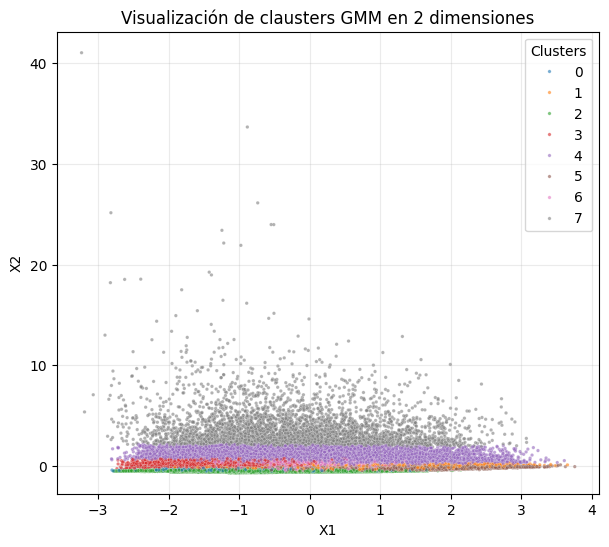

In [ ]:
# Gráfico 2D
df_gmm = df_pca.copy()
df_gmm['Clusters'] = cluster_labels
df_gmm['Clusters'] = df_gmm['Clusters'].astype('category')

plt.figure(figsize=(7,6))
sns.scatterplot(data=df_gmm, x="X1", y="X2", hue='Clusters',
                s=6, alpha=0.6)

plt.title("Visualización de clusters GMM en 2 dimensiones")
plt.xlabel("X1")
plt.ylabel("X2")

plt.grid(True, alpha=0.25)
plt.show()

### 2. ¿Es posible distinguir claramente entre los clústers generados?

Los clusters parecen distribuirse en "capas" horizontales, a lo largo de la primera componente principal. Si bien se observan claramente unos 4-5 clusters, no se aprecian los 8 con claridad

### 3. Descripción de clusters

In [90]:
# Creación de df
df_clusters = X.copy()

X['Clusters'] = cluster_labels
X['Clusters'] = X['Clusters'].astype('category')

# describir por clase
X.groupby('Clusters', observed = False).describe().transpose()

Clusters                                    0            1             2  \
Age                        count  7328.000000  8635.000000  37630.000000   
                           mean     37.914984    41.086508     38.141775   
                           std      15.952502    13.748024     15.707705   
                           min       7.000000     7.000000      7.000000   
                           25%      25.000000    30.000000     25.000000   
                           50%      38.000000    42.000000     38.000000   
                           75%      50.000000    51.000000     50.000000   
                           max      85.000000    85.000000     85.000000   
Flight Distance            count  7328.000000  8635.000000  37630.000000   
                           mean    573.411026  2179.887203    537.006830   
                           std     297.642447   809.693672    292.704851   
                           min      56.000000    86.000000     31.000000   
                           25%     331.000000  1551.500000    296.000000   
                           50%     533.500000  2049.000000    491.000000   
                           75%     819.000000  2680.500000    761.750000   
                           max    1379.000000  4983.000000   1372.000000   
Departure Delay in Minutes count  7328.000000  8635.000000  37630.000000   
                           mean      3.038755     6.131558      0.000000   
                           std       1.703287     3.796243      0.000000   
                           min       1.000000     1.000000      0.000000   
                           25%       2.000000     3.000000      0.000000   
                           50%       3.000000     6.000000      0.000000   
                           75%       4.000000     9.000000      0.000000   
                           max       7.000000    15.000000      0.000000   
Cleanliness                count  7328.000000  8635.000000  37630.000000   
                           mean      3.180950     3.448060      3.197529   
                           std       1.289852     1.219079      1.345187   
                           min       1.000000     1.000000      0.000000   
                           25%       2.000000     3.000000      2.000000   
                           50%       3.000000     4.000000      3.000000   
                           75%       4.000000     4.000000      4.000000   
                           max       5.000000     5.000000      5.000000   

Clusters                                    3             4             5  \
Age                        count  6947.000000  11799.000000  20920.000000   
                           mean     36.862387     39.906687     42.036090   
                           std      15.806901     14.606415     13.497826   
                           min       7.000000      7.000000      7.000000   
                           25%      24.000000     28.000000     32.000000   
                           50%      36.000000     41.000000     43.000000   
                           75%      49.000000     51.000000     52.000000   
                           max      80.000000     85.000000     85.000000   
Flight Distance            count  6947.000000  11799.000000  20920.000000   
                           mean    544.179070   1606.893720   2315.268164   
                           std     273.778738   1082.092644    795.722613   
                           min      31.000000     67.000000   1091.000000   
                           25%     328.000000    641.000000   1620.000000   
                           50%     502.000000   1482.000000   2218.000000   
                           75%     743.000000   2400.000000   2870.000000   
                           max    1334.000000   4983.000000   4983.000000   
Departure Delay in Minutes count  6947.000000  11799.000000  20920.000000   
                           mean     20.386210     47.054242      0.000000   
                           s

### 4. Visualización en 3D

In [ ]:
# Pipeline para PCA con 3 componentes
pca_pipe3D = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=3, random_state=0))
])

# Ajustar
X_pca3D = pca_pipe3D.fit_transform(X)

df_pca3D = pd.DataFrame(X_pca3D, columns = ['X1', 'X2', 'X3'])


In [96]:
# Gráfico 3D
df_gmm3D = df_pca3D.copy()
df_gmm3D['Clusters'] = cluster_labels
df_gmm3D['Clusters'] = df_gmm3D['Clusters'].astype('category')

fig = px.scatter_3d(df_gmm3D, 
                    x='X1', y='X2', z='X3',
                    color='Clusters',
                    title='Visualización de clusters GMM en 3 dimensiones',
                    opacity=0.8)

# Hacer puntos más pequeños
fig.update_traces(marker=dict(size=2))

# Personalizar layout
fig.update_layout(
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='X3',
    ),
    width=800,
    height=600,
    font=dict(size=12)
)

fig.show()


### 5. Conclusiones 3D

En 3D, se siguen observando las mismas "capas" o "planos" que se veía en 2D, pero se logra apreciar que estas no están perfectamente alineadas, sino que tienen distintas orientaciones. Esto explica que no todos los clusters hayan sido visibles en el caso 2D. 

Además, se logra apreciar el efecto de la variable `Cleanliness`, que si bien es de tipo int, en realidad es categórica ordinal, y genera ciertos "cortes" en los planos. Fuera de este problema, en general los clusters se ven bien separados, lo que no era observable en el caso de visualización 2D.
Esto, a la vez, refuerza la importancia de apoyar el uso de algoritmos de clustering con métricas como silhouette, especialmente cuando el desempeño del modelo no es evidente al visualizar.


Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>